## Setup

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    StandardScaler,
    LabelEncoder,
    MinMaxScaler,
    OrdinalEncoder,
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from xgboost import XGBRegressor

## Loading the Data

In [ ]:
# Function to execute ETL script and retrieve DataFrame

In [2]:
file_path_1 = "../data/raw/flare.data1"
file_path_2 = "../data/raw/flare.data2"

df_1 = pd.read_csv(file_path_1, sep=r"\s+", skiprows=1, header=None)
df_2 = pd.read_csv(file_path_2, sep=r"\s+", skiprows=1, header=None)
flare_df = pd.concat([df_1, df_2])

In [3]:
names = [
    "modified Zurich class",
    "largest spot size",
    "spot distribution",
    "activity",
    "evolution",
    "previous 24 hour flare activity",
    "historically-complex",
    "became complex on this pass",
    "area",
    "area of largest spot",
    "common flares",
    "moderate flares",
    "severe flares",
]
flare_df.columns = names

In [4]:
print(flare_df.T)

                                0    1    2    3    4    5    6    7    8     \
modified Zurich class              C    D    C    D    D    D    D    D    D   
largest spot size                  S    S    S    S    A    A    A    A    K   
spot distribution                  O    O    O    O    O    O    O    O    O   
activity                           1    1    1    1    1    1    1    1    1   
evolution                          2    3    3    3    3    2    2    2    3   
previous 24 hour flare activity    1    1    1    1    1    1    1    1    1   
historically-complex               1    1    1    1    1    1    1    1    1   
became complex on this pass        2    2    2    2    2    2    2    2    2   
area                               1    1    1    1    1    1    1    1    1   
area of largest spot               2    2    1    2    2    2    1    2    2   
common flares                      0    0    0    0    0    0    0    0    0   
moderate flares                    0    

In [ ]:
flare_df["area of largest spot"].unique()

## Adding visualizations 

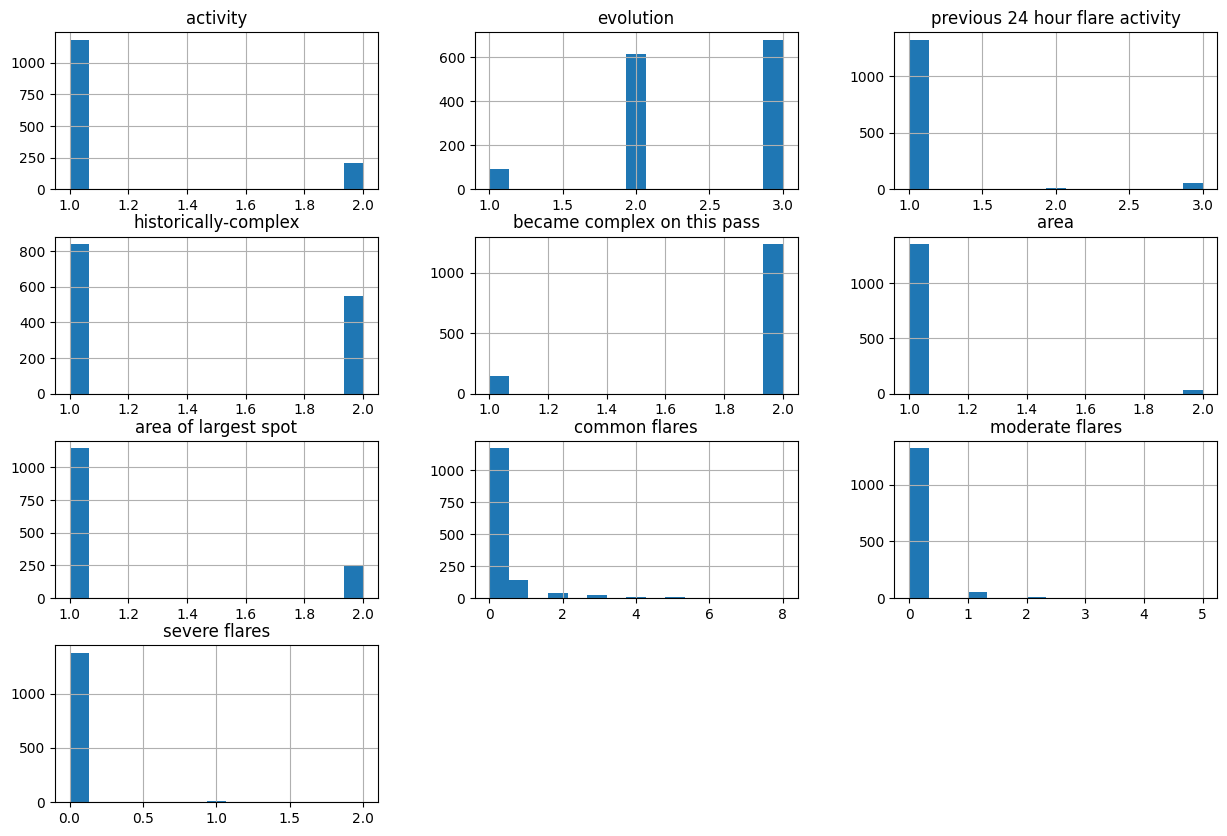

In [5]:
flare_df.hist(bins=15, figsize=(15, 10))
plt.show()

In [6]:
columns_to_encode = ["modified Zurich class", "largest spot size", "spot distribution"]
df_viz = flare_df[columns_to_encode].copy()
df_viz[columns_to_encode] = OrdinalEncoder().fit_transform(flare_df[columns_to_encode])

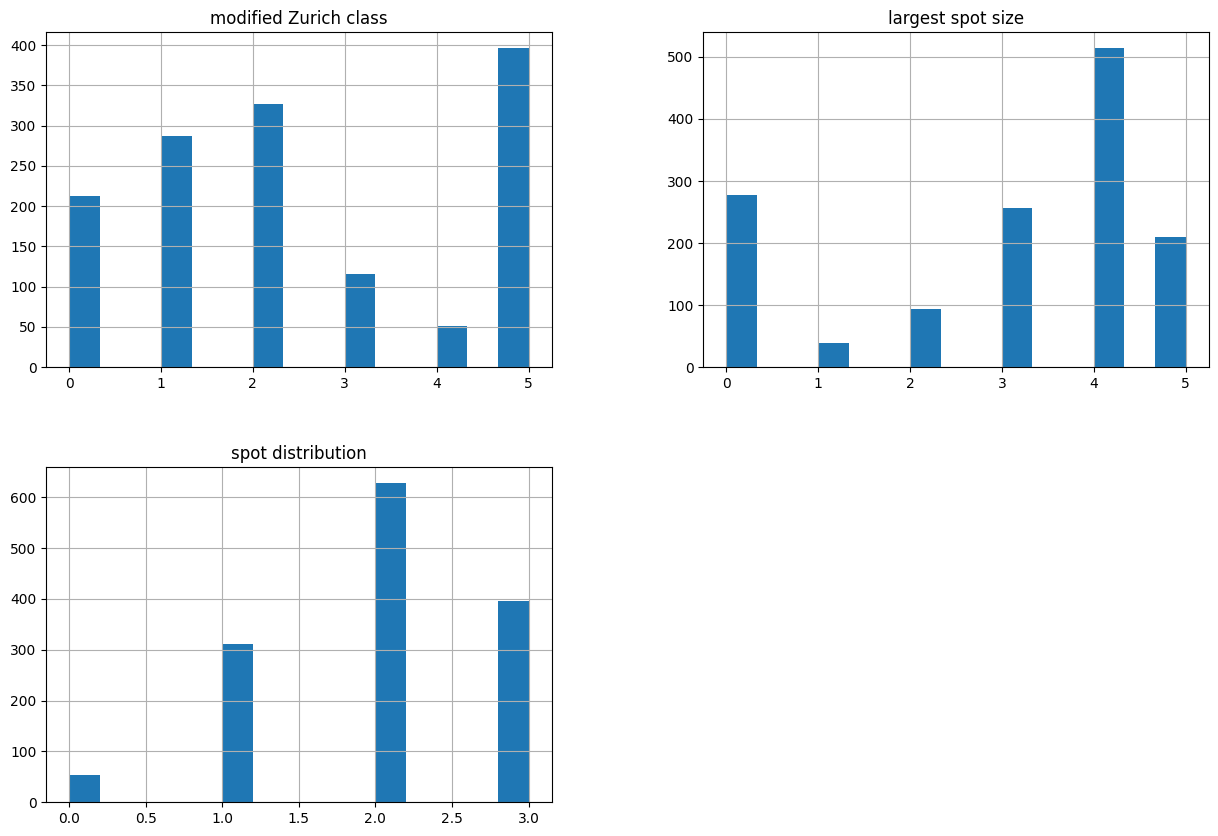

In [7]:
df_viz.hist(bins=15, figsize=(15, 10))
plt.show()

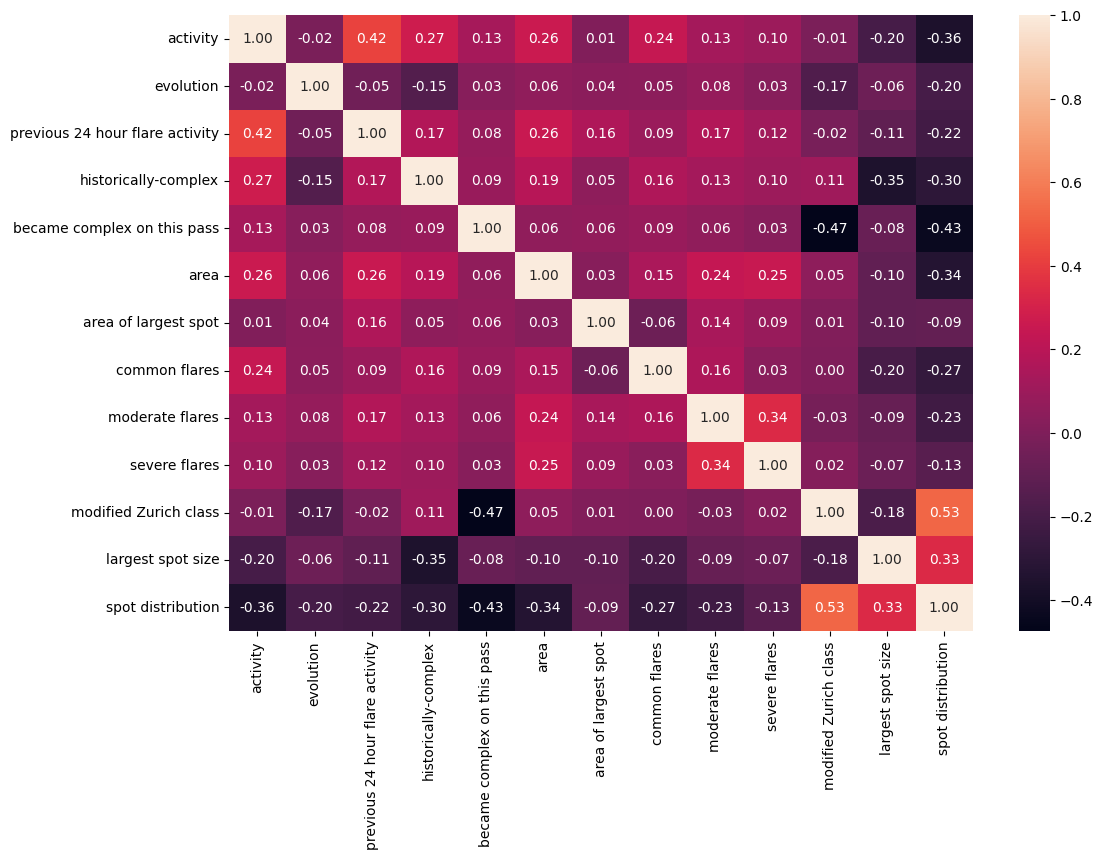

In [8]:
df_remaining = flare_df.drop(columns=columns_to_encode)
df_combined = pd.concat([df_remaining, df_viz], axis=1)
plt.figure(figsize=(12, 8))
sns.heatmap(df_combined.corr(), annot=True, fmt=".2f")
plt.show()

## Preprocessing and Feature Engineering

In [9]:
features_encoded = flare_df[columns_to_encode].copy()
ordinal_encoder = OrdinalEncoder()

features_encoded = pd.DataFrame(
    OrdinalEncoder().fit_transform(features_encoded), index=features_encoded.index
)
features_cat_ord = flare_df.drop(columns=columns_to_encode)
flare_df_encoded = pd.concat([features_cat_ord, features_encoded], axis=1)

In [14]:
scaler = MinMaxScaler()
flare_df_scaled_temp = scaler.fit_transform(flare_df.drop(columns_to_encode, axis=1))
flare_df_scaled = pd.DataFrame(flare_df_scaled_temp, columns=flare_df.columns)

## Splitting the Dataset

In [15]:
# Note: Target = columns_to_encode
X = flare_df_scaled.drop([columns_to_encode], axis=1)
y = flare_df_scaled[[columns_to_encode]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

KeyError: "[('modified Zurich class', 'largest spot size', 'spot distribution')] not found in axis"

## Training the Model

In [ ]:
model1 = XGBRegressor(objective="reg:squarederror", random_state=42)
model1.fit(X_train, y_train)

In [ ]:
model2 = RandomForestClassifier(random_state=42)
model2.fit(X_train, y_train)

## Evaluating the Model

In [ ]:
# Evaluating XGBRegressor Model
y_pred1 = model1.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(10, 7))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=np.unique(y),
    yticklabels=np.unique(y),
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


report2_df = pd.DataFrame(
    classification_report(y_test, y_pred1, output_dict=True)
).transpose()
print(report2_df)

In [ ]:
# Evalutaing RandomForestClassifier Model
y_pred2 = model2.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(10, 7))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=np.unique(y),
    yticklabels=np.unique(y),
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


report1_df = pd.DataFrame(
    classification_report(y_test, y_pred2, output_dict=True)
).transpose()
print(report1_df)

## Improving the Model

In [ ]:
scores = cross_val_score(model1, X, y, cv=5)
print("Average accuracy with Cross-Validation:", np.mean(scores))

In [ ]:
scores = cross_val_score(model2, X, y, cv=5)
print("Average accuracy with Cross-Validation:", np.mean(scores))